In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
###import seaborn 
%matplotlib inline



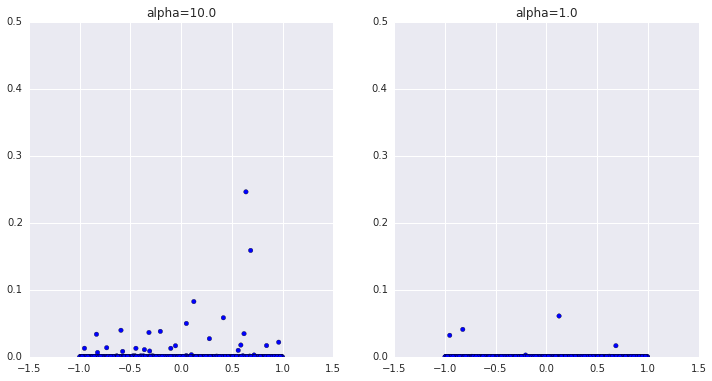

In [4]:
N=1000

#### base distibution
u = np.random.uniform(-1,1,N) 

def get_ck(v,_N):
    c =[]
    for i in range(_N):
        first = 1.0
        for j in range(i):
            first = first*(1 -v[j])
        c.append(first*v[i])
    return c

### Stick breanking process
def sbp(alpha):
    v = np.random.beta(1,alpha,N)
    ck = get_ck(v,N)
    return ck

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(u,sbp(10.0))
plt.ylim(0,0.5)
plt.title("alpha=10.0")
plt.subplot(1,2,2)
plt.scatter(u,sbp(1.0))
plt.title("alpha=1.0")
plt.ylim(0,0.5)
###plt.savefig("SBP.png")
plt.show()

In [5]:
def alec(x,alpha,d):
    xxx = [0]
    n = sum(x)
    n_k = 0
    for i in range(len(x)):
        n_k = n_k + x[i]
        xxx.append((n_k*1.0-d*(i+1))/(n+alpha)*1.0)
    xxx.append(1)
    return xxx

In [6]:
#### Chinese Restaurant Process
def CRP(_N,alpha = 30):
    custom_list = [0]
    custom_number_list = [1]
    custom_judge =[0,1.0/((alpha+1)*1.0),1]
    for i in range(_N-1):
        judge =  np.random.uniform()
        for j in range(len(custom_judge)-1):
            if custom_judge[j]< judge < custom_judge[j+1]:
                custom_list.append(j)
                if j == len(custom_judge)-2:
                    custom_number_list.append(0)
                custom_number_list[j] = custom_number_list[j] +1
        custom_judge = alec(custom_number_list, alpha,0.0)
    return custom_number_list

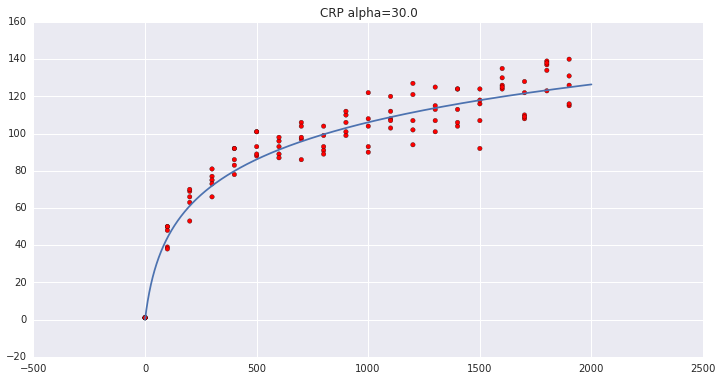

In [7]:
### draa the sample 
xxx =[]
yyy =[]
for k in range(20):      
    x = [len(CRP(100*k,30)) for j in range(5)]
    xxx.extend(x)
    y = [ k*100 for j in range(5)]
    yyy.extend(y)

####  calulcate the expectaion
yy = [ i/4.0 for i in range(8000)]
def  expect(_i,alpha=30):
    return alpha * np.log(1+ _i/alpha)
xx = map(expect,yy)

plt.figure(figsize=(12,6))
plt.plot(yy,xx) ## expectation
plt.scatter(yyy,xxx,c="r") ## sample
plt.title("CRP alpha=30.0")
###plt.savefig("CRP.png")
plt.show()

In [10]:
### Pitman-Yor process
def PYR(_N,alpha = 10,d=0.0):
    custom_list = [0]
    custom_number_list = [1]
    custom_judge =[0,1.0/((alpha+1)*1.0),1]
    for i in range(_N-1):
        judge =  np.random.uniform()
        judge =  np.random.uniform()
        for j in range(len(custom_judge)-1):
            if custom_judge[j]< judge < custom_judge[j+1]:
                custom_list.append(j)
                if j == len(custom_judge)-2:
                    custom_number_list.append(0)
                custom_number_list[j] = custom_number_list[j] +1
        custom_judge = alec(custom_number_list, alpha,d)
    return custom_number_list

In [11]:
xxx2 =[]
yyy2 =[]
for k in range(20):      
    x = [len(PYR(k*100,10,0.5)) for j in range(4)]
    xxx2.extend(x)
    y = [ k*100 for j in range(4)]
    yyy2.extend(y)

xxx3 =[]
yyy3 =[]
for k in range(20):      
    x = [len(PYR(k*100,10,0.0)) for j in range(4)]
    xxx3.extend(x)
    y = [ k*100 for j in range(4)]
    yyy3.extend(y)

xxx4 =[]
yyy4 =[]
for k in range(20):      
    x = [len(PYR(k*100,10,0.9)) for j in range(4)]
    xxx4.extend(x)
    y = [ k*100 for j in range(4)]
    yyy4.extend(y)

In [12]:
### convert log scale
def convert_log(_g):
    llog = np.log10(np.array(_g))
    return llog

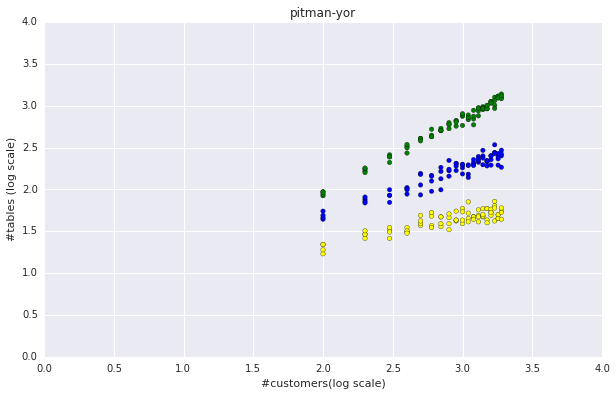

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(convert_log(yyy2),convert_log(xxx2))
plt.scatter(convert_log(yyy3),convert_log(xxx3),c="yellow")
plt.scatter(convert_log(yyy3),convert_log(xxx4),c="green")
plt.xlim(0,4)
plt.ylim(0,4)
plt.title("pitman-yor")
plt.xlabel("#customers(log scale)")
plt.ylabel("#tables (log scale)")
#####plt.savefig("pitman-ypr.png")
plt.show()